In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import utility
import math

from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM


weather_models = {}

EXPERIEMENT_SEED = 42
np.random.seed(EXPERIEMENT_SEED)
tf.random.set_seed(EXPERIEMENT_SEED)
utility.EXPERIEMENT_SEED = EXPERIEMENT_SEED

In [2]:
weather_df = utility.get_processed_dataset()
weather_df.head(4)

,pyranometer,pyroheliometer,azimuth_angle_deg,tower_dry_bulb_temp_deg,tower_wet_bulb_temp_deg,tower_dew_point_deg,tower_rh_pct,peak_wind_speed_mps,avg_wind_direction_deg,station_pressure_mbar,precipitation_mm,snow_depth_cm,moisture,albedometer,datetime_cpy,total_cloud_coverage_pct
datetime,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,9.95,271.3,806.779,0.0,0.219,0.0,0.0,2020-01-01 00:00:00,-1
2020-01-01 00:01:00,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,8.20,272.9,806.840,0.0,0.206,0.0,0.0,2020-01-01 00:01:00,-1
2020-01-01 00:02:00,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,6.70,288.8,806.876,0.0,0.148,0.0,0.0,2020-01-01 00:02:00,-1
2020-01-01 00:03:00,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,7.70,294.0,806.823,0.0,0.235,0.0,0.0,2020-01-01 00:03:00,-1


In [3]:
train, test, train_indexes, test_indexs = utility.get_train_test_split(weather_df, months=[1,8])

C:\Users\mruty\My Github Repositories\solar-power-prediction\utility.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['total_cloud_coverage_pct'] = dataset['total_cloud_coverage_pct'] / 100


Original dataset shape:  (40829, 15)
----------------------------------------------------------------
Shape of a sample day record (8 hours * 60, num_features): (480, 15)
Min-Max Active Uptime in Hours: (8,13)

First Random Three days: 
(8, 20)  (8, 26)  (1, 1)  
----------------------------------------------------------------
Dataset shape after daywise chunks (62, 480, 15)
----------------------------------------------------------------
Data shape with reference format: [num_instances, num_time_steps, num_features]
Training shape (57, 480, 15) , Testing Shape (5, 480, 15)


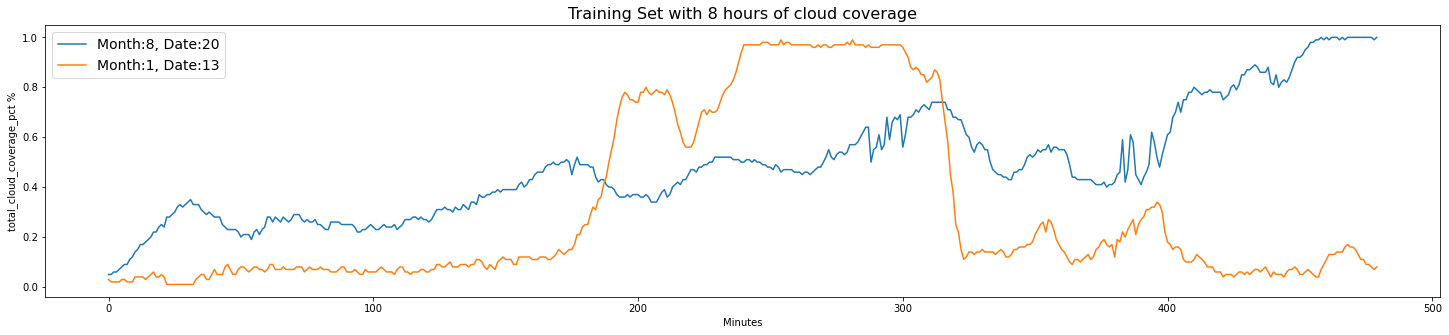

In [12]:
plt.figure(figsize=(25,5))
plt.plot(train[0, :, -1], label="Month:{}, Date:{}".format(train_indexes[0][0], train_indexes[0][1]))
plt.plot(train[7, :, -1], label="Month:{}, Date:{}".format(train_indexes[7][0], train_indexes[7][1]))
plt.xlabel("Minutes")
plt.ylabel("total_cloud_coverage_pct %")
plt.legend(fontsize=14)
plt.title("Training Set with 8 hours of cloud coverage", fontsize=16)
plt.show()